# General Overview - Statistical Analysis

- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm, t, chisquare
from scipy.stats import chi2_contingency
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv('diabetes_visual.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67611 entries, 0 to 67610
Data columns (total 41 columns):
race                        67611 non-null object
gender                      67611 non-null object
age                         67611 non-null object
discharge_disposition_id    67611 non-null object
admission_source_id         67611 non-null int64
time_in_hospital            67611 non-null int64
num_lab_procedures          67611 non-null int64
num_procedures              67611 non-null int64
num_medications             67611 non-null int64
num_outpatient              67611 non-null int64
num_emergency               67611 non-null int64
num_inpatient               67611 non-null int64
diag_1                      67611 non-null object
diag_2                      67611 non-null object
diag_3                      67611 non-null object
num_diagnoses               67611 non-null int64
max_glu_serum               67611 non-null object
A1Cresult                   67611 non-null object


In [4]:
diabetes.head(10)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,Caucasian,Female,[0-10),Unknown,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,Caucasian,Female,[10-20),Home,7,3,59,0,18,0,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),Home,7,2,11,5,13,2,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),Home,7,2,44,1,16,0,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),Home,7,1,51,0,8,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
5,Caucasian,Male,[50-60),Home,2,3,31,6,16,0,...,No,No,Steady,No,No,No,No,Yes,YES,Urgent
6,Caucasian,Male,[60-70),Home,2,4,70,1,21,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective
7,Caucasian,Male,[70-80),Home,7,5,73,0,12,0,...,No,No,No,No,No,No,No,Yes,YES,Emergency
8,Caucasian,Female,[80-90),Home,4,13,68,2,28,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Urgent
9,Caucasian,Female,[90-100),Hospital,4,12,33,3,18,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective


In [5]:
round(diabetes.describe(), 2)

,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,67611.00,67611.00,67611.00,67611.00,67611.00,67611.00,67611.00,67611.00,67611.00
mean,4.42,4.27,42.79,1.43,15.65,0.26,0.10,0.17,7.24
std,2.97,2.93,19.88,1.76,8.25,0.86,0.43,0.54,2.00
min,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,7.00,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,7.00,6.00,57.00,2.00,20.00,0.00,0.00,0.00,9.00
max,25.00,14.00,100.00,6.00,70.00,10.00,8.00,5.00,16.00


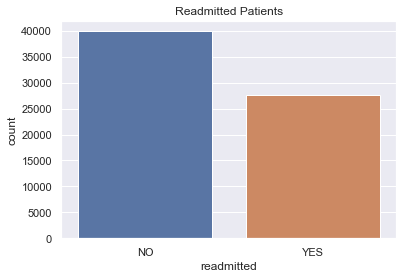

In [6]:
# readmit rates
sns.countplot(x='readmitted', data=diabetes)
plt.title('Readmitted Patients')
plt.show()

# categorical variables

The categorical variables are: race, gender, age, discharge disposition, diagnosis 1, 2, and 3, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide-metformin, glipizide-metformin, metformin-pioglitazone, change, diabetesMed, readmitted, and admission_type.

For the categorical variables, we are using the chi-square test for association with a p-value of 0.005.

## chi-square test for association

In [7]:
# define a function that returns a table, a chi-square value, and a p value
def chisquare_test(var):
    chi_test = pd.crosstab(var, diabetes.readmitted)
    display(chi_test)
    
    chisq_value, pvalue, df, expected = chi2_contingency(chi_test)
    
    print('Chi-square value: ', chisq_value)
    print('p-value: ', pvalue)

In [8]:
cols_cat = ['race', 'gender', 'age', 'discharge_disposition_id', 
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 
            'change', 'diabetesMed', 'admission_type']

for x in cols_cat:
    print(x)
    chisquare_test(diabetes[x])
    print('\n')

race


readmitted,NO,YES
race,,
AfricanAmerican,7619,4926
Asian,340,148
Caucasian,30243,21700
Hispanic,961,527
Other,759,388


Chi-square value:  95.04968420921475
p-value:  1.112211680007704e-19


gender


readmitted,NO,YES
gender,,
Female,20994,15030
Male,18928,12659


Chi-square value:  18.778548666221205
p-value:  1.4680912291242787e-05


age


readmitted,NO,YES
age,,
[0-10),125,27
[10-20),357,164
[20-30),726,346
[30-40),1741,850
[40-50),4211,2378
[50-60),7468,4482
[60-70),8965,6194
[70-80),9432,7729
[80-90),5824,4894


Chi-square value:  509.5925564888873
p-value:  5.07454399588586e-104


discharge_disposition_id


readmitted,NO,YES
discharge_disposition_id,,
Home,30384,20508
Hospital,7447,6056
Unknown,2091,1125


Chi-square value:  141.25171803657489
p-value:  2.126077780299831e-31


diag_1


readmitted,NO,YES
diag_1,,
Circulatory,11842,8877
Diabetes,3166,2381
Digestive,3800,2501
Genitourinary,2020,1316
Injury,2693,1781
Musculoskeletal,2525,1409
Neoplasms,1644,813
Other,6983,4682
Respiratory,5249,3929


Chi-square value:  171.31525149813993
p-value:  6.836120486134318e-33


diag_2


readmitted,NO,YES
diag_2,,
Circulatory,12155,9227
Diabetes,5789,3585
Digestive,1709,1050
Genitourinary,3032,2144
Injury,1115,626
Musculoskeletal,771,475
Neoplasms,893,650
None,154,34
Other,10439,7046


Chi-square value:  154.33575379600404
p-value:  1.1134906912183214e-28


diag_3


readmitted,NO,YES
diag_3,,
Circulatory,11585,8641
Diabetes,7393,4720
Digestive,1520,1101
Genitourinary,2189,1711
Injury,854,503
Musculoskeletal,799,516
Neoplasms,653,458
None,752,277
Other,11676,7752


Chi-square value:  187.9333095116759
p-value:  1.1139557814511261e-35


max_glu_serum


readmitted,NO,YES
max_glu_serum,,
>200,496,419
>300,352,348
None,38107,26215
Norm,967,707


Chi-square value:  33.251594824485956
p-value:  2.8501727135945293e-07


A1Cresult


readmitted,NO,YES
A1Cresult,,
>7,1696,1074
>8,3563,2396
None,32349,22888
Norm,2314,1331


Chi-square value:  41.82031289095746
p-value:  4.380298687306334e-09


change


readmitted,NO,YES
change,,
Ch,17318,13033
No,22604,14656


Chi-square value:  89.81927288809257
p-value:  2.6093991872666515e-21


diabetesMed


readmitted,NO,YES
diabetesMed,,
No,10466,5759
Yes,29456,21930


Chi-square value:  262.7691593682162
p-value:  4.274817495665959e-59


admission_type


readmitted,NO,YES
admission_type,,
Elective,8650,4765
Emergency,20084,14257
Newborn,6,3
Trauma Center,17,0
Unknown,4093,3629
Urgent,7072,5035


Chi-square value:  298.8766985921051
p-value:  1.7464587632265746e-62




Based on the chi-square and p-value, we can safely say that there is no relation between the independent variables and the target variable.

### medications

In [9]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
               'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone']

for x in medications:
    print(x)
    chisquare_test(diabetes[x])
    print('\n')

metformin


readmitted,NO,YES
metformin,,
Down,253,164
No,31089,22111
Steady,8077,5117
Up,503,297


Chi-square value:  39.16116006915186
p-value:  1.6044393740100753e-08


repaglinide


readmitted,NO,YES
repaglinide,,
Down,16,12
No,39468,27238
Steady,400,408
Up,38,31


Chi-square value:  31.314113119701467
p-value:  7.299536952315738e-07


nateglinide


readmitted,NO,YES
nateglinide,,
Down,5,3
No,39651,27478
Steady,256,203
Up,10,5


Chi-square value:  2.4446549027007083
p-value:  0.48537626004265666


chlorpropamide


readmitted,NO,YES
chlorpropamide,,
Down,1,0
No,39882,27659
Steady,38,27
Up,1,3


Chi-square value:  2.6203316420066765
p-value:  0.4539362914723166


glimepiride


readmitted,NO,YES
glimepiride,,
Down,70,60
No,37857,26207
Steady,1860,1334
Up,135,88


Chi-square value:  2.586581410281381
p-value:  0.45984685680718196


acetohexamide


readmitted,NO,YES
acetohexamide,,
No,39922,27688
Steady,0,1


Chi-square value:  0.03384486779608605
p-value:  0.8540371882463118


glipizide


readmitted,NO,YES
glipizide,,
Down,175,179
No,35084,23834
Steady,4351,3426
Up,312,250


Chi-square value:  53.424193354786766
p-value:  1.4886931483849976e-11


glyburide


readmitted,NO,YES
glyburide,,
Down,215,185
No,35598,24515
Steady,3771,2734
Up,338,255


Chi-square value:  9.517112456883856
p-value:  0.023150007740240997


tolbutamide


readmitted,NO,YES
tolbutamide,,
No,39911,27684
Steady,11,5


Chi-square value:  0.28640318415339483
p-value:  0.5925347280883733


pioglitazone


readmitted,NO,YES
pioglitazone,,
Down,37,41
No,37048,25475
Steady,2751,2087
Up,86,86


Chi-square value:  20.83776273654503
p-value:  0.00011376720335896249


rosiglitazone


readmitted,NO,YES
rosiglitazone,,
Down,49,22
No,37426,25662
Steady,2367,1956
Up,80,49


Chi-square value:  38.33422047562932
p-value:  2.4014802182769957e-08


acarbose


readmitted,NO,YES
acarbose,,
No,39828,27588
Steady,90,95
Up,4,6


Chi-square value:  9.799092493157767
p-value:  0.007449962750180926


miglitol


readmitted,NO,YES
miglitol,,
Down,0,1
No,39915,27676
Steady,7,11
Up,0,1


Chi-square value:  5.909631521419744
p-value:  0.11609058479196631


troglitazone


readmitted,NO,YES
troglitazone,,
No,39921,27687
Steady,1,2


Chi-square value:  0.10153760701514802
p-value:  0.7499921901728897


tolazamide


readmitted,NO,YES
tolazamide,,
No,39902,27679
Steady,20,10


Chi-square value:  0.43990467495441343
p-value:  0.5071684682843492


insulin


readmitted,NO,YES
insulin,,
Down,3887,3244
No,20246,13036
Steady,12174,8511
Up,3615,2898


Chi-square value:  138.70021711766395
p-value:  7.206214077059946e-30


glyburide-metformin


readmitted,NO,YES
glyburide-metformin,,
Down,3,0
No,39648,27491
Steady,266,197
Up,5,1


Chi-square value:  4.0328545806092535
p-value:  0.2579382136982365


glipizide-metformin


readmitted,NO,YES
glipizide-metformin,,
No,39919,27685
Steady,3,4


Chi-square value:  0.23693510120486444
p-value:  0.626428562871871


metformin-pioglitazone


readmitted,NO,YES
metformin-pioglitazone,,
No,39921,27689
Steady,1,0


Chi-square value:  0.03384486779608605
p-value:  0.8540371882463118




The medications: nateglinide (Chi-square value: 2.44, p-value: 0.485), chlorpropamide (Chi-square value: 2.62, p-value:  0.453), glimepiride (Chi-square value: 2.58, p-value:  0.459), acetohexamide (Chi-square value: 0.033, p-value: 0.854), glyburide (Chi-square value: 9.51, p-value: 0.023), tolbutamide (Chi-square value: 0.286, p-value: 0.592), acarbose (Chi-square value: 9.79, p-value: 0.007), miglitol (Chi-square value: 5.9, p-value: 0.116), troglitazone (Chi-square value: 0.101, p-value: 0.749), tolazamide (Chi-square value: 0.439, p-value: 0.507), glyburide-metformin (Chi-square value: 4.032, p-value: 0.257), glipizide-metformin (Chi-square value: 0.236, p-value: 0.626), and metformin-pioglitazone (Chi-square value: 0.033, p-value: 0.854) all failed to pass the test since they have higher p-values than the limit of 0.005.

Since these variables are not independent of the target variable, we are removing them from the dataset.

In [10]:
meds = ['nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glyburide', 'tolbutamide', 'acarbose', 
        'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 
        'metformin-pioglitazone']

diabetes = diabetes.drop(columns=meds)

In [11]:
diabetes.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,...,metformin,repaglinide,glipizide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,admission_type
0,Caucasian,Female,[0-10),Unknown,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,Caucasian,Female,[10-20),Home,7,3,59,0,18,0,...,No,No,No,No,No,Up,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),Home,7,2,11,5,13,2,...,No,No,Steady,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),Home,7,2,44,1,16,0,...,No,No,No,No,No,Up,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),Home,7,1,51,0,8,0,...,No,No,Steady,No,No,Steady,Ch,Yes,NO,Emergency


# numerical variables

## statistical testing - independent t-test

The numerical variables are: admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, num_outpatient, num_emergency, num_inpatient, diag_1, diag_2, diag_3, and num_diagnoses.

In [12]:
# binary classification, 2 sample t-test
diabetes = diabetes.reset_index(drop=True)

In [13]:
# drop admission source id since each id correlates to a string
diabetes = diabetes.drop(columns=['admission_source_id'])

In [14]:
# define a function that creates two lists based on readmits for 2 sample t-tests
def two_lists(list1, list2, var):
    for x in range(len(diabetes)):
        if diabetes.readmitted[x] == 'YES':
            list1.append(diabetes[var][x])
        else:
            list2.append(diabetes[var][x])

In [15]:
# time in hospital - null hypothesis: time spent in hospital the same for readmitted and not readmitted patients
time_in_hospital_yes = []
time_in_hospital_no = []

# create lists
two_lists(time_in_hospital_yes, time_in_hospital_no, 'time_in_hospital')

# two sample t-test
stats.ttest_ind(time_in_hospital_yes, time_in_hospital_no) # reject null hypothesis

Ttest_indResult(statistic=16.634915814671366, pvalue=5.173793383837987e-62)

In [16]:
# num_lab_procedures - separate into two lists based on Yes and No for readmitted
num_lab_procedures_yes = []
num_lab_procedures_no = []

# create lists
two_lists(num_lab_procedures_yes, num_lab_procedures_no, 'num_lab_procedures')

# two sample t-test
stats.ttest_ind(num_lab_procedures_yes, num_lab_procedures_no) # reject null hypothesis

Ttest_indResult(statistic=14.054613564475002, pvalue=8.347502251131505e-45)

In [17]:
# num_medications - separate into two lists based on Yes and No for readmitted
num_medications_yes = []
num_medications_no = []

# create lists
two_lists(num_medications_yes, num_medications_no, 'num_medications')

# two sample t-test
stats.ttest_ind(num_medications_yes, num_medications_no) # reject null hypothesis

Ttest_indResult(statistic=10.02807319459814, pvalue=1.1918897702733321e-23)

In [18]:
# num_outpatient - separate into two lists based on Yes and No for readmitted
num_outpatient_yes = []
num_outpatient_no = []

# create lists
two_lists(num_outpatient_yes, num_outpatient_no, 'num_outpatient')

# two sample t-test
stats.ttest_ind(num_outpatient_yes, num_outpatient_no) # reject null hypothesis

Ttest_indResult(statistic=17.490903906244842, pvalue=2.378598723759828e-68)

In [19]:
# num_emergency - separate into two lists based on Yes and No for readmitted
num_emergency_yes = []
num_emergency_no = []

# create lists
two_lists(num_emergency_yes, num_emergency_no, 'num_emergency')

# two sample t-test
stats.ttest_ind(num_emergency_yes, num_emergency_no) # reject null hypothesis

Ttest_indResult(statistic=22.533919925892164, pvalue=5.004765789864742e-112)

In [20]:
# num_inpatient - separate into two lists based on Yes and No for readmitted
num_inpatient_yes = []
num_inpatient_no = []

# create lists
two_lists(num_inpatient_yes, num_inpatient_no, 'num_inpatient')

# two sample t-test
stats.ttest_ind(num_inpatient_yes, num_inpatient_no) # reject null hypothesis

Ttest_indResult(statistic=37.85862540023531, pvalue=0.0)

In [21]:
# num_diagnoses - separate into two lists based on Yes and No for readmitted
num_diagnoses_yes = []
num_diagnoses_no = []

# create lists
two_lists(num_diagnoses_yes, num_diagnoses_no, 'num_diagnoses')

# two sample t-test
stats.ttest_ind(num_diagnoses_yes, num_diagnoses_no) # reject null hypothesis

Ttest_indResult(statistic=28.25085460226781, pvalue=1.4464671079014537e-174)

Based on the [2-sample t-tests](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), we can conclude that each variable is [independent](http://benalexkeen.com/comparative-statistics-in-python-using-scipy/) of the target variable, readmitted.

# label encoding

Binary columns will be replaced with 0 for No and 1 for Yes. In the gender column, Male and Female will be replaced with 0 and 1 respectively.

In [22]:
# display unique entries for each column
# count the unique values, equal to 1 means all values are the same
for x in diabetes.columns:
    print('Column Name: {}'.format(x)) 
    print('Unique Values: {}'.format(diabetes[x].unique()))

Column Name: race
Unique Values: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Column Name: gender
Unique Values: ['Female' 'Male']
Column Name: age
Unique Values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Column Name: discharge_disposition_id
Unique Values: ['Unknown' 'Home' 'Hospital']
Column Name: time_in_hospital
Unique Values: [ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]
Column Name: num_lab_procedures
Unique Values: [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  19  64  25  53  52  87  27  37  28  36  48  10   2  65  67  40
  58  57  32  83  34  39  69  38  22  96  46  72  78  56  61  88  66  43
  50   1  18  82  54   9  63  24  71  77  81  76  90  93   3  13  80  85
  16  15  12  30  23  17  21  79  26  95  97  84  14  74  86  98  20   5
   6   8   7  89  91  94  92   4  99 100]
Column Name: num_procedures
Unique Values: [0 5 1 6 2 3 4]
Column Name: num_medications
Unique

In [23]:
# readmitted: No and Yes
diabetes['readmitted'] = diabetes['readmitted'].replace({'NO': 0, 'YES': 1})

In [24]:
# gender: male and female
diabetes['gender'] = diabetes['gender'].replace({'Male': 0, 'Female': 1})

In [25]:
# change: No and Ch(ange)
diabetes['change'] = diabetes['change'].replace({'No': 0, 'Ch': 1})

In [26]:
# diabetesMed: No and Yes
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace({'No': 0, 'Yes': 1})

Looking at the values for each columns, some have identical values. Since we are using dummy variables to encode the data, the values must be modified to avoid confusion when analyzing correlation coefficients and building the machine learning model.

In [27]:
# Column Name: race
# Unique Values: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
diabetes['race'] = diabetes['race'].replace('Other', 'Other_race')

In [28]:
# Column Name: discharge_disposition_id
# Unique Values: ['Unknown' 'Home' 'Hospital']
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].replace('Unknown', 'Unknown_discharge')

In [29]:
# Column Name: diag_1
# Unique Values: ['Diabetes' 'Other' 'Neoplasms' 'Circulatory' 'Respiratory' 'Injury' 
# 'Genitourinary' 'Musculoskeletal' 'Digestive']
diabetes['diag_1'] = diabetes['diag_1'].replace({'Diabetes':'Diabetes_1', 'Other':'Other_1', 'Neoplasms':'Neoplasms_1', 
                                                 'Circulatory':'Circulatory_1', 'Respiratory':'Respiratory_1', 
                                                 'Injury':'Injury_1', 'Genitourinary':'Genitourinary_1', 
                                                 'Musculoskeletal':'Musculoskeletal_1', 'Digestive':'Digestive_1'})

In [30]:
# Column Name: diag_2
# Unique Values:  ['None' 'Diabetes' 'Neoplasms' 'Circulatory' 'Respiratory' 'Other'
#  'Injury' 'Musculoskeletal' 'Genitourinary' 'Digestive']
diabetes['diag_2'] = diabetes['diag_2'].replace({'None':'None_2', 'Diabetes':'Diabetes_2', 'Neoplasms':'Neoplasms_2', 
                                                 'Circulatory':'Circulatory_2', 'Respiratory':'Respiratory_2', 
                                                 'Injury':'Injury_2', 'Genitourinary':'Genitourinary_2', 
                                                 'Musculoskeletal':'Musculoskeletal_2', 'Digestive':'Digestive_2',
                                                'Other':'Other_2'})

In [31]:
# Column Name: diag_3
# Unique Values:  ['None' 'Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury'
#  'Neoplasms' 'Genitourinary' 'Digestive' 'Musculoskeletal']
diabetes['diag_3'] = diabetes['diag_3'].replace({'None':'None_3', 'Diabetes':'Diabetes_3', 'Neoplasms':'Neoplasms_3', 
                                                 'Circulatory':'Circulatory_3', 'Respiratory':'Respiratory_3', 
                                                 'Injury':'Injury_3', 'Genitourinary':'Genitourinary_3', 
                                                 'Musculoskeletal':'Musculoskeletal_3', 'Digestive':'Digestive_3',
                                                'Other':'Other_3'})

In [32]:
# Column Name: max_glu_serum
# Unique Values: ['None' '>300' 'Norm' '>200']
diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace({'None':'None_glu', 'Norm':'Norm_glu'})

In [33]:
# Column Name: A1Cresult
# Unique Values: ['None' '>7' '>8' 'Norm']
diabetes['A1Cresult'] = diabetes['A1Cresult'].replace({'None':'None_a1c', 'Norm':'Norm_a1c'})

In [34]:
# Column Name: metformin
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['metformin'] = diabetes['metformin'].replace({'No':'No_metformin', 'Steady':'Steady_metformin', 
                                                       'Up':'Up_metformin', 'Down':'Down_metformin'})

In [35]:
# Column Name: repaglinide
# Unique Values: ['No' 'Up' 'Steady' 'Down']
diabetes['repaglinide'] = diabetes['repaglinide'].replace({'No':'No_repaglinide', 'Steady':'Steady_repaglinide', 
                                                       'Up':'Up_repaglinide', 'Down':'Down_repaglinide'})

In [36]:
# Column Name: glipizide
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['glipizide'] = diabetes['glipizide'].replace({'No':'No_glipizide', 'Steady':'Steady_glipizide', 
                                                       'Up':'Up_glipizide', 'Down':'Down_glipizide'})

In [37]:
# Column Name: pioglitazone
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['pioglitazone'] = diabetes['pioglitazone'].replace({'No':'No_pioglitazone', 'Steady':'Steady_pioglitazone', 
                                                       'Up':'Up_pioglitazone', 'Down':'Down_pioglitazone'})

In [38]:
# Column Name: rosiglitazone
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['rosiglitazone'] = diabetes['rosiglitazone'].replace({'No':'No_rosiglitazone', 'Steady':'Steady_rosiglitazone', 
                                                       'Up':'Up_rosiglitazone', 'Down':'Down_rosiglitazone'})

In [39]:
# Column Name: insulin
# Unique Values: ['No' 'Up' 'Steady' 'Down']
diabetes['insulin'] = diabetes['insulin'].replace({'No':'No_insulin', 'Steady':'Steady_insulin', 
                                                       'Up':'Up_insulin', 'Down':'Down_insulin'})

In [40]:
# Column Name: admission_type
# Unique Values: ['Unknown' 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Trauma Center']
diabetes['admission_type'] = diabetes['admission_type'].replace('Unknown', 'Unknown_admission_type')

## encoding categorical variables - dummy variables

In [41]:
# create dummy variables
race_var = pd.get_dummies(diabetes.race)
age_var = pd.get_dummies(diabetes.age)
discharge_disposition_var = pd.get_dummies(diabetes.discharge_disposition_id)
diag_1_var = pd.get_dummies(diabetes.diag_1)
diag_2_var = pd.get_dummies(diabetes.diag_2)
diag_3_var = pd.get_dummies(diabetes.diag_3)
max_glu_serum_var = pd.get_dummies(diabetes.max_glu_serum)
A1Cresult_var = pd.get_dummies(diabetes.A1Cresult)
metformin = pd.get_dummies(diabetes.metformin)
repaglinide = pd.get_dummies(diabetes.repaglinide)
glipizide = pd.get_dummies(diabetes.glipizide)
pioglitazone = pd.get_dummies(diabetes.pioglitazone)
rosiglitazone = pd.get_dummies(diabetes.rosiglitazone)
insulin = pd.get_dummies(diabetes.insulin)
admission_type = pd.get_dummies(diabetes.admission_type)

In [42]:
# combine dummy variables
all_var = pd.concat([race_var, age_var, discharge_disposition_var, diag_1_var, diag_2_var, 
                     diag_3_var, max_glu_serum_var, A1Cresult_var, metformin, repaglinide, 
                     glipizide, pioglitazone, rosiglitazone, insulin, admission_type], axis=1)

all_var.head()

,AfricanAmerican,Asian,Caucasian,Hispanic,Other_race,[0-10),[10-20),[20-30),[30-40),[40-50),...,Down_insulin,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [43]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67611 entries, 0 to 67610
Data columns (total 27 columns):
race                        67611 non-null object
gender                      67611 non-null int64
age                         67611 non-null object
discharge_disposition_id    67611 non-null object
time_in_hospital            67611 non-null int64
num_lab_procedures          67611 non-null int64
num_procedures              67611 non-null int64
num_medications             67611 non-null int64
num_outpatient              67611 non-null int64
num_emergency               67611 non-null int64
num_inpatient               67611 non-null int64
diag_1                      67611 non-null object
diag_2                      67611 non-null object
diag_3                      67611 non-null object
num_diagnoses               67611 non-null int64
max_glu_serum               67611 non-null object
A1Cresult                   67611 non-null object
metformin                   67611 non-null object


## labeled dataset

In [44]:
# create new diabetes data with all labeled data
diabetes_ml = pd.concat([diabetes.gender, diabetes.time_in_hospital, diabetes.num_lab_procedures, 
                         diabetes.num_procedures, diabetes.num_medications, diabetes.num_outpatient, 
                         diabetes.num_emergency, diabetes.num_inpatient, diabetes.num_diagnoses, 
                         diabetes.change, diabetes.diabetesMed, all_var, diabetes.readmitted], axis=1)

diabetes_ml.head()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses,change,...,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent,readmitted
0,1,1,41,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,3,59,0,18,0,0,0,9,1,...,0,0,1,0,1,0,0,0,0,1
2,1,2,11,5,13,2,0,1,6,0,...,1,0,0,0,1,0,0,0,0,0
3,0,2,44,1,16,0,0,0,7,1,...,0,0,1,0,1,0,0,0,0,0
4,0,1,51,0,8,0,0,0,5,1,...,0,1,0,0,1,0,0,0,0,0


## correlation

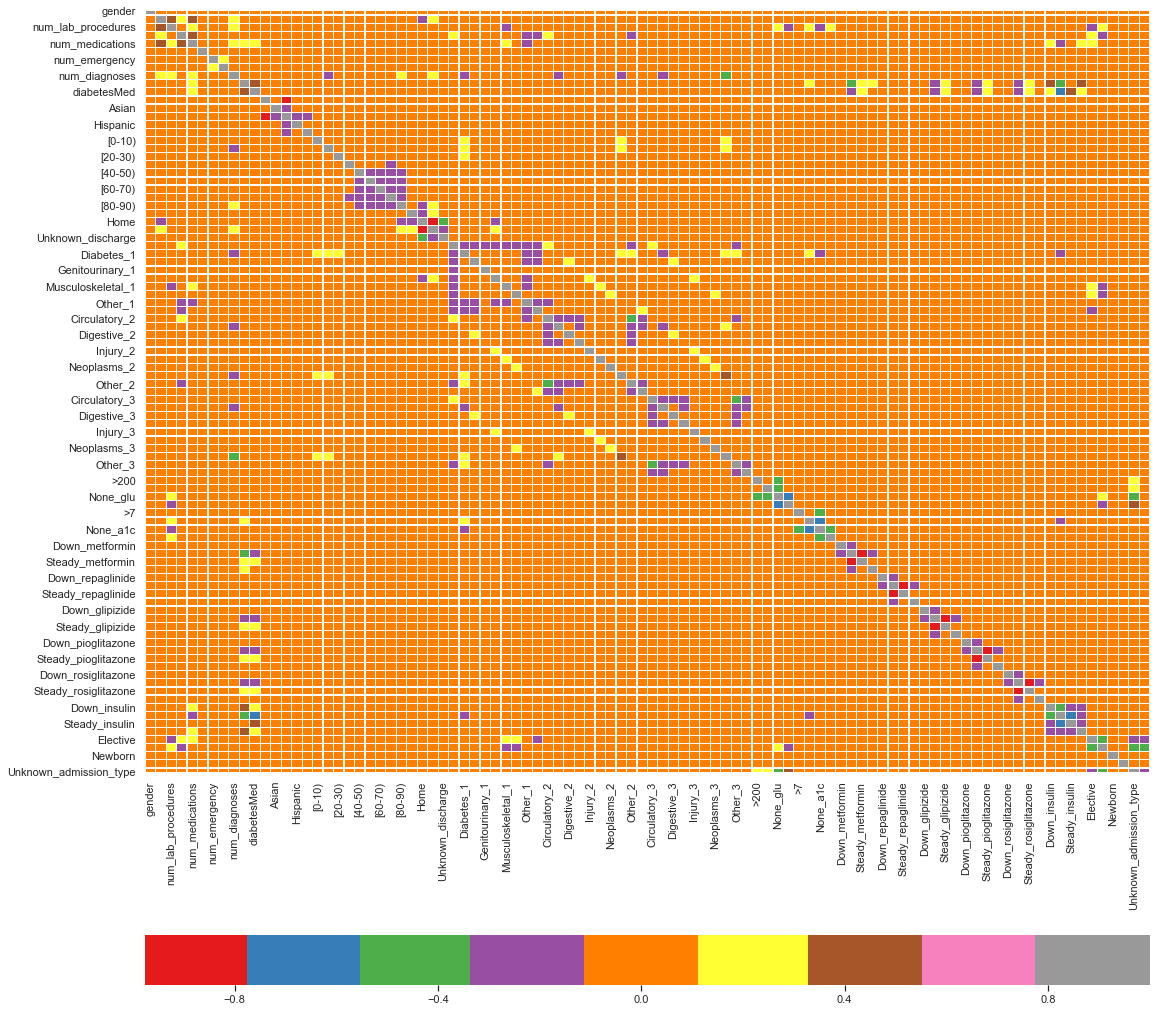

In [45]:
# correlation table
diabetes_corr = diabetes_ml.drop(columns='readmitted')

plt.figure(figsize=(18, 20))
sns.heatmap(diabetes_corr.corr(), center=0, cmap='Set1', linewidths=.2, cbar_kws={'orientation': 'horizontal'})
plt.show()

If the correlation value is greater than 0.7, then we have to drop one of the two columns.

The correlation heatmap is 96 x 96, which is quite large for this notebook. Instead, we can find each correlation coefficient individually and mark the ones that have a coefficient greater than 0.7 in a list.

In [46]:
# create empty list and add columns with their correlation coefficient greater than 0.7
corr_list = []

for x in diabetes_corr:
    for y in diabetes_corr:
        if (diabetes_corr[x].corr(diabetes_corr[y]) > 0.7) or (diabetes_corr[x].corr(diabetes_corr[y]) < -0.7):
            if x != y:
                corr_list.append([x, y, diabetes_corr[x].corr(diabetes_corr[y])])

In [47]:
corr_list

[['AfricanAmerican', 'Caucasian', -0.8690610794462897],
 ['Caucasian', 'AfricanAmerican', -0.8690610794462899],
 ['Home', 'Hospital', -0.8715734726476805],
 ['Hospital', 'Home', -0.8715734726476805],
 ['None_glu', 'Norm_glu', -0.7046297379963865],
 ['Norm_glu', 'None_glu', -0.7046297379963867],
 ['No_metformin', 'Steady_metformin', -0.9460840029048075],
 ['Steady_metformin', 'No_metformin', -0.9460840029048075],
 ['No_repaglinide', 'Steady_repaglinide', -0.9442040462576687],
 ['Steady_repaglinide', 'No_repaglinide', -0.9442040462576687],
 ['No_glipizide', 'Steady_glipizide', -0.9385797697683551],
 ['Steady_glipizide', 'No_glipizide', -0.9385797697683551],
 ['No_pioglitazone', 'Steady_pioglitazone', -0.9731792548199584],
 ['Steady_pioglitazone', 'No_pioglitazone', -0.9731792548199583],
 ['No_rosiglitazone', 'Steady_rosiglitazone', -0.9760948424029345],
 ['Steady_rosiglitazone', 'No_rosiglitazone', -0.9760948424029344]]

In [48]:
diabetes_ml.head()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses,change,...,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent,readmitted
0,1,1,41,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,3,59,0,18,0,0,0,9,1,...,0,0,1,0,1,0,0,0,0,1
2,1,2,11,5,13,2,0,1,6,0,...,1,0,0,0,1,0,0,0,0,0
3,0,2,44,1,16,0,0,0,7,1,...,0,0,1,0,1,0,0,0,0,0
4,0,1,51,0,8,0,0,0,5,1,...,0,1,0,0,1,0,0,0,0,0


# saving machine learning dataset

In [49]:
# save dataset to new file for machine learning
# diabetes_ml.to_csv('diabetes_ml.csv')